In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn import metrics

In [2]:
train_data = pd.read_csv('Google_Stock_Price_Train.csv', date_parser = True)
train_data.head()

training_set = train_data.iloc[:,1:2].values

In [3]:
scaler = MinMaxScaler(feature_range=(0,1))
train_set_sc = scaler.fit_transform(training_set)



In [59]:
X_train=[]
y_train = []
n=70

for i in range(n,len(train_set_sc)):
    X_train.append(train_set_sc[i-n: i,0])
    y_train.append(train_set_sc[i,0])



In [60]:
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_train.shape

(1188, 70, 1)

In [61]:
# X_test, y_test = np.array(X_test), np.array(y_test)
# print(X_train.shape)
# print(y_train.shape)
# print('---')
#print(y_train)
# print(y_test.shape)


# LSTM MODEL

In [62]:
reg = Sequential()
reg.add(LSTM(units = 50,return_sequences = True,  input_shape=(X_train.shape[1], 1)))
reg.add(Dropout(0.2))


#Second LSTM Layer
reg.add(LSTM(units = 50, return_sequences = True))
reg.add(Dropout(0.2))

# Third LSTM Layer
reg.add(LSTM(units = 50, return_sequences = True))
reg.add(Dropout(0.2))

# Fourth LSTM Layer
reg.add(LSTM(units = 50))
reg.add(Dropout(0.2))

# The output layer
reg.add(Dense(units = 1))








             

In [63]:
reg.summary()
X_train


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 70, 50)            10400     
_________________________________________________________________
dropout_12 (Dropout)         (None, 70, 50)            0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 70, 50)            20200     
_________________________________________________________________
dropout_13 (Dropout)         (None, 70, 50)            0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 70, 50)            20200     
_________________________________________________________________
dropout_14 (Dropout)         (None, 70, 50)            0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 50)               

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.06782499],
        [0.06823424],
        [0.07601012]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.06823424],
        [0.07601012],
        [0.08082819]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.07601012],
        [0.08082819],
        [0.05807724]],

       ...,

       [[0.917665  ],
        [0.91130292],
        [0.91811147],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.91130292],
        [0.91811147],
        [0.93176576],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.91811147],
        [0.93176576],
        [0.94402485],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [64]:
reg.compile(optimizer='adam', loss = 'mean_squared_error')

In [65]:
reg.fit(X_train, y_train, epochs=50,batch_size=32, verbose=1)

Epoch 1/50
38/38 [==============================] - 4s 94ms/step - loss: 0.0436
Epoch 2/50
38/38 [==============================] - 3s 77ms/step - loss: 0.0069
Epoch 3/50
38/38 [==============================] - 3s 77ms/step - loss: 0.0052
Epoch 4/50
38/38 [==============================] - 3s 90ms/step - loss: 0.0047
Epoch 5/50
38/38 [==============================] - 3s 78ms/step - loss: 0.0050
Epoch 6/50
38/38 [==============================] - 3s 77ms/step - loss: 0.0048
Epoch 7/50
38/38 [==============================] - 3s 76ms/step - loss: 0.0041
Epoch 8/50
38/38 [==============================] - 3s 76ms/step - loss: 0.0047
Epoch 9/50
38/38 [==============================] - 3s 76ms/step - loss: 0.0044
Epoch 10/50
38/38 [==============================] - 3s 76ms/step - loss: 0.0045
Epoch 11/50
38/38 [==============================] - 3s 76ms/step - loss: 0.0044
Epoch 12/50
38/38 [==============================] - 3s 77ms/step - loss: 0.0046
Epoch 13/50
38/38 [==================

# PREP TEST DATA TO COMPARE

In [66]:
test_data = pd.read_csv("Google_Stock_Price_Test.csv")

test_set = test_data.iloc[:, 1:2].values

In [67]:
data_total = pd.concat((train_data['Open'], test_data['Open']), axis=0)

inputs=data_total[len(train_data) - len(test_data) - 50:].values

inputs= inputs.reshape(-1,1)

inputs = scaler.transform(inputs)


In [68]:
X_test = []
y_test = []
n=70

for i in range(n,inputs.shape[0]):
    X_test.append(inputs[i-n:i,0])


In [73]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1], 1))

X_test.shape


(20, 70, 1)

In [74]:
y_pred = reg.predict(X_test)

In [75]:
y_pred = scaler.inverse_transform(y_pred)

# VISUALIZE

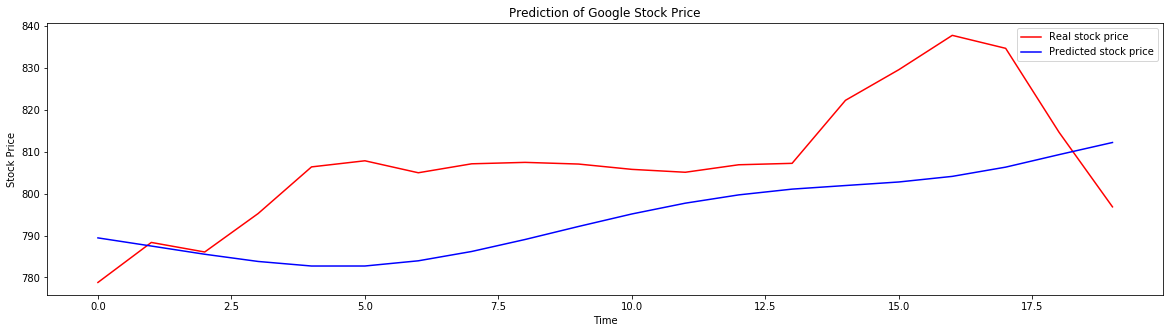

In [76]:
#Visualize Results
plt.figure(figsize=(20,5))
plt.plot(test_set, color='red', label = "Real stock price")
plt.plot(y_pred, color='blue', label = "Predicted stock price")
plt.title("Prediction of Google Stock Price")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

# Linear Regression

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [78]:
tr_data = train_data = pd.read_csv('Google_Stock_Price_Train.csv', date_parser = True)
tr_data.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-03,325.25,332.83,324.97,663.59,7380500.0
1,2012-01-04,331.27,333.87,329.08,666.45,5749400.0
2,2012-01-05,329.83,330.75,326.89,657.21,6590300.0
3,2012-01-06,328.34,328.77,323.68,648.24,5405900.0
4,2012-01-09,322.04,322.29,309.46,620.76,11688800.0


In [79]:
tst_data = pd.read_csv('Google_Stock_Price_Test.csv', date_parser = True)
tst_data.head()

,Date,Open,High,Low,Close,Volume
0,2017-01-03,778.81,789.63,775.80,786.14,1657300
1,2017-01-04,788.36,791.34,783.16,786.90,1073000
2,2017-01-05,786.08,794.48,785.02,794.02,1335200
3,2017-01-06,795.26,807.90,792.20,806.15,1640200
4,2017-01-09,806.40,809.97,802.83,806.65,1272400


In [80]:
x_tr = tr_data[['Open','High', 'Low', 'Volume']].values
y_tr = tr_data['Close'].values

In [81]:
x_tst = tst_data[['Open','High', 'Low', 'Volume']].values
y_tst = tst_data['Close'].values

In [82]:
x_train, y_train = x_tr, y_tr
x_test, y_test = x_tst, y_tst

In [83]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
print(regressor.coef_)
print(regressor.intercept_)

[ 1.95877680e-01 -1.08853737e+01  1.13095329e+01  3.79742177e-05]
360.40172199706365


In [85]:
predicted = regressor.predict(x_test)
print(predicted)

[754.40588319 798.71235287 795.07824942 743.57927405 829.4820455
 842.971888   824.66560288 819.38288804 853.16453882 836.00568628
 850.32137505 809.50764    865.09686812 747.53742228 836.37799812
 813.03267399 868.59517571 750.37950626 807.90366731 817.04218114]


In [86]:
dframe = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':predicted.flatten()})


In [87]:
dframe.head(50)

,Actual,Predicted
0,786.14,754.405883
1,786.90,798.712353
2,794.02,795.078249
3,806.15,743.579274
4,806.65,829.482045
5,804.79,842.971888
6,807.91,824.665603
7,806.36,819.382888
8,807.88,853.164539
9,804.61,836.005686


In [88]:
import math

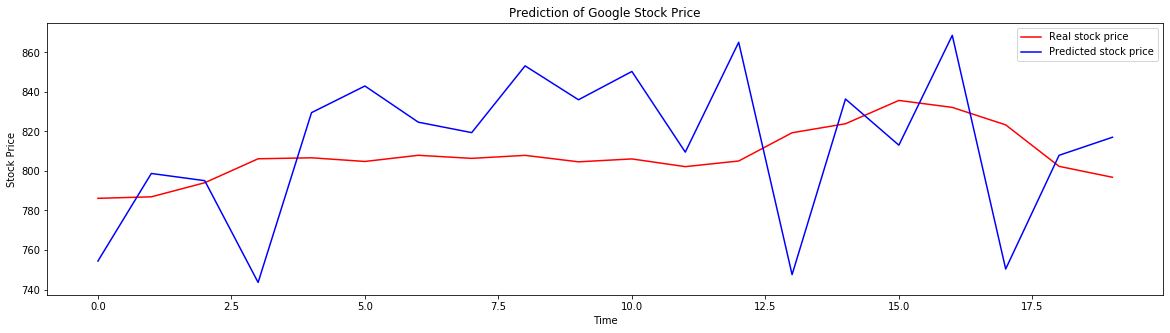

In [89]:
plt.figure(figsize=(20,5))
plt.plot(y_test, color='red', label = "Real stock price")
plt.plot(predicted, color='blue', label = "Predicted stock price")
plt.title("Prediction of Google Stock Price")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()